# Zadanie 7_6

In [1]:
pip install numpy-financial==1.0.0

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import numpy_financial as npf

In [3]:
flat_price = 120000
flat_rate = 0.05
years = 5
freq_flat = 1
nper1 = years *freq_flat
periods1 = np.arange(1,nper1+1,dtype =int)
flat_values=[]

### Obliczenie wzrostu wartości mieszkania

In [4]:
flat_value = flat_price
flat_values.append(flat_value)
for i in range(1,61):
    flat_value = flat_value + (flat_value*(flat_rate/12))
    flat_values.append(flat_value)
flat_values


[120000,
 120500.0,
 121002.08333333333,
 121506.25868055555,
 122012.5347583912,
 122520.92031988449,
 123031.42415455068,
 123544.05508852798,
 124058.82198473018,
 124575.73374299989,
 125094.79930026238,
 125616.02763068014,
 126139.42774580797,
 126665.00869474885,
 127192.7795643103,
 127722.74947916159,
 128254.92760199143,
 128789.32313366639,
 129325.94531339,
 129864.80341886246,
 130405.90676644105,
 130949.26471130122,
 131494.88664759832,
 132042.78200863,
 132592.9602669993,
 133145.43093477844,
 133700.20356367336,
 134257.28774518866,
 134816.69311079363,
 135378.4293320886,
 135942.5061209723,
 136508.93322980969,
 137077.72045160056,
 137648.87762014888,
 138222.41461023284,
 138798.34133777546,
 139376.6677600162,
 139957.40387568294,
 140540.55972516496,
 141126.1453906865,
 141714.17099648103,
 142304.64670896638,
 142897.5827369204,
 143492.98933165756,
 144090.87678720613,
 144691.25544048616,
 145294.13567148818,
 145899.52790345272,
 146507.44260305044,
 147117

#### Wartość nieruchomości po 5 latach

In [5]:
round(flat_values[-1],2)

154003.04

### Obliczenie wysokości miesięcznych wplat na lokatę

In [6]:
saving_target = round(flat_values[-1],2)
years = 5
saving_period = years *12 # 60
yearly_rate = 0.12
monthly_rate = yearly_rate / 12 # 0.01
initial_founds = 0


In [7]:
monthly_payment = npf.pmt(monthly_rate, saving_period,initial_founds,-saving_target)
round(monthly_payment,2)

np.float64(1885.68)

#### obliczenie oszczędności w poszczególnych okresach płatności


In [8]:
periods = np.arange(1,saving_period+1)
saving_values = []
monthly_payment = round(monthly_payment,2)
type(saving_values)

list

In [9]:
for period in periods:
    value = npf.fv(monthly_rate, period, -monthly_payment, initial_founds)
    #print(round(value,2))
    #saving_values.append(round(value,2))
    saving_values.append(value)

In [10]:
arr_saving_values = np.array(saving_values)
arr_saving_values[[0,1,2,-3,-2,-1]]

array([  1885.68      ,   3790.2168    ,   5713.798968  , 147252.86369457,
       150611.07233152, 154002.86305483])

## Odpowiedzi
1) Cena mieszkania a 5 lat szacowana jest na 154003.04
2) Aby uzbierać fundusze na zakup mieszkania, należy wpłacać co miesiąc 1885.68 (przy stopie procentowej 12%)
3) Wykres poniżej:

Text(0, 0.5, 'Wzrost wartośc')

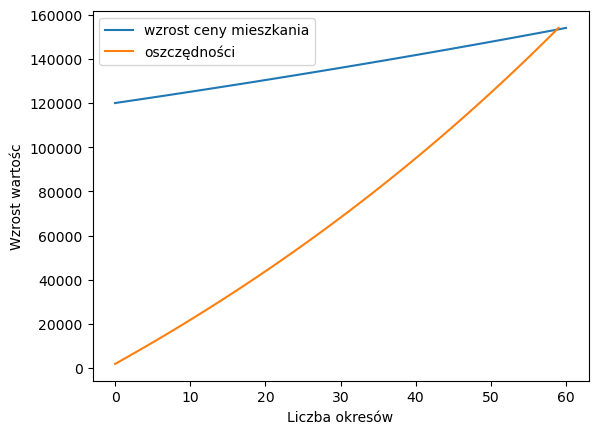

In [11]:
import matplotlib.pyplot as plt
plt.plot(flat_values,label='wzrost ceny mieszkania')
plt.plot(arr_saving_values,label='oszczędności')
plt.legend()
plt.xlabel('Liczba okresów')
plt.ylabel('Wzrost wartośc')